# Iteratative estimate of eigenvalues

MAT1120, September 12, 2024

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from ipywidgets import interact

In [3]:
import numpy as np
import numpy.linalg as la

## Power method

consider a 2x2 matrix

In [4]:
A = np.matrix([[1.8, 0.8],
               [0.2, 1.2]])

eigenvector with eigenvalue 2

In [5]:
v1 = np.matrix([[4],
                [1]])

In [6]:
A @ v1

matrix([[8.],
        [2.]])

eigenvector with eigenvalue 1

In [7]:
v2 = np.matrix([[-1],
                [1]])

In [8]:
A @ v2

matrix([[-1.],
        [ 1.]])

Approximation by power method, with initial value
<pre>
x0 = [ [-0.5],
      [   1] ]
</pre>

In [9]:
x0 = np.matrix([[-0.5],
               [1]])

to go to next step, first compute y(k+1) = A xk

In [10]:
y1 = A @ x0
print(y1)

[[-0.1]
 [ 1.1]]


then get its maximal entry

In [11]:
mu1 = np.max(y1) # we know the max is positive for this

and normalize y(k+1) to get x(x+1)

In [12]:
x1 = y1 / mu1
print(x1)

[[-0.09090909]
 [ 1.        ]]


define a function for the above steps

In [13]:
def next_x(prev_x):
    y = A @ prev_x
    mu1 = np.max(y)
    mu2 = np.max(-y) # if we have a large negative component, use this
    if mu1 > mu2:
        return y / mu1
    return y / -mu2

generate a sequence of xk's, and scatter plot

In [14]:
xks = [x0]
for i in range(10):
    last_xk = xks[-1]
    xks.append(next_x(last_xk))

In [15]:
xcoords = [xk[0,0] for xk in xks]
ycoords = [xk[1,0] for xk in xks]

<IPython.core.display.Javascript object>


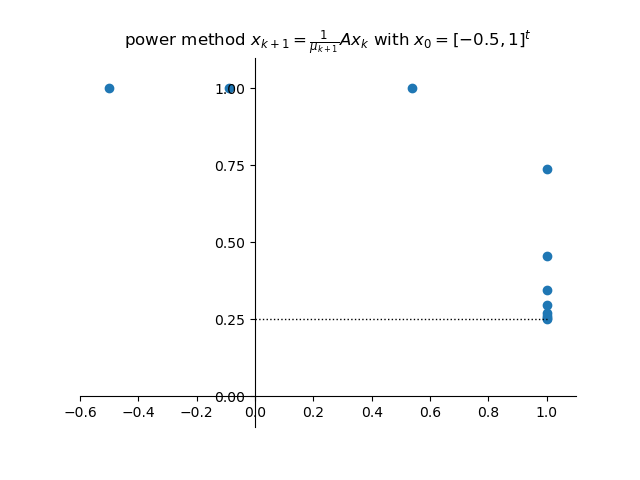

Text(0.5, 1.0, 'power method $x_{k+1} = \\frac{1}{\\mu_{k+1}} A x_k$ with $x_0 = [-0.5, 1]^t$')

In [16]:
# set up drawing context
fig1, ax1 = plt.subplots()
ax1.scatter(xcoords,ycoords)
ax1.plot([0, 1], [0.25, 0.25], linestyle='dotted', color='k', linewidth=1)
ax1.set_xlim((-0.6,1.1))
ax1.set_ylim((-0.1,1.1))
ax1.set_yticks(np.arange(0, 1.01, 0.25))
ax1.spines[['top', 'right']].set_visible(False)
ax1.spines[['left', 'bottom']].set_position('zero')
ax1.set_title(r'power method $x_{k+1} = \frac{1}{\mu_{k+1}} A x_k$ with $x_0 = [-0.5, 1]^t$')

## Inverse power method

In [17]:
def next_x_with_mat(mat, prev_x):
    y = mat @ prev_x
    mu1 = np.max(y)
    mu2 = np.max(-y)
    if mu1 > mu2:
        return y / mu1
    return y / -mu2

<IPython.core.display.Javascript object>


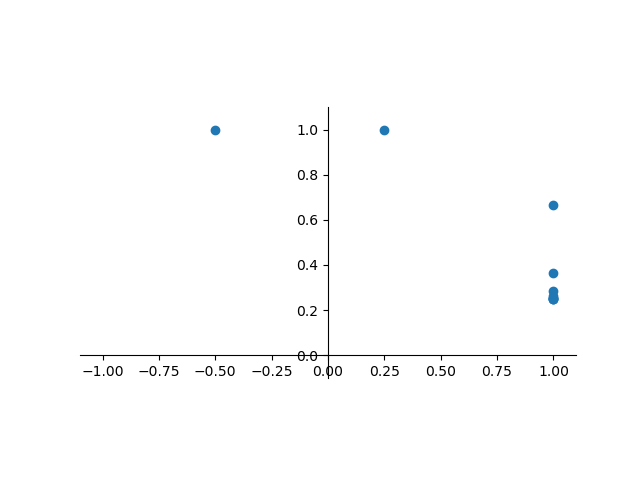

interactive(children=(FloatSlider(value=2.5, description='alpha', max=4.5, min=0.5), Output()), _dom_classes=(…

<function __main__.show_graph1(alpha)>

In [18]:
fig2, ax2 = plt.subplots()

def show_graph1(alpha):
    B = la.inv(A - alpha * np.identity(2))
    xks = [x0]
    for i in range(10):
        last_xk = xks[-1]
        xks.append(next_x_with_mat(B, last_xk))
    xcoords = [xk[0,0] for xk in xks]
    ycoords = [xk[1,0] for xk in xks]
    plt.figure(fig2)
    plt.clf()
    cur_ax = plt.gca()
    cur_ax.scatter(xcoords,ycoords)
    cur_ax.set_aspect('equal')
    cur_ax.set_xlim((-1.1,1.1))
    cur_ax.set_ylim((-0.1,1.1))
    cur_ax.spines[['top', 'right']].set_visible(False)
    cur_ax.spines[['left', 'bottom']].set_position('zero')
    plt.show()

interact(show_graph1, alpha=(0.5,4.5))

In [19]:
Ap = np.matrix([[10, -8, -4], [-8, 13, 4], [-4, 5, 4]])
xp0 = np.matrix([[1],[1],[1]])

In [20]:
np.linalg.eigvals(Ap)

array([21.67877988,  3.32122012,  2.        ])

In [22]:
fig3, ax3 = plt.subplots()

def show_graph2(alpha):
    B = la.inv(Ap - alpha * np.identity(3))
    xpks = [xp0]
    for i in range(50):
        last_xpk = xpks[-1]
        xpks.append(next_x_with_mat(B, last_xpk))
    last_xpk = xpks[-1]
    mu = np.max(B @ last_xpk)
    mu2 = np.max(-B @ last_xpk)
    if mu < mu2:
        mu = -mu2
    nu = alpha + (1.0 / mu)
    print("estimated eigenvalue: %s" % nu)
    xcoords = [xpk[0,0] for xpk in xpks]
    ycoords = [xpk[1,0] for xpk in xpks]
    zcoords = [xpk[2,0] for xpk in xpks]
    plt.figure(fig3)
    plt.clf()
    cur_ax = fig3.add_subplot(projection="3d")
    cur_ax.plot(xcoords,ycoords,zcoords)
    cur_ax.scatter(xcoords,ycoords,zcoords)
    cur_ax.set_xlim((-1.1,1.1))
    cur_ax.set_ylim((-1.1,1.1))
    cur_ax.set_zlim((-1.1,1.1))
    plt.show()

interact(show_graph2, alpha=(0.5,25))

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=12.75, description='alpha', max=25.0, min=0.5), Output()), _dom_classe…

<function __main__.show_graph2(alpha)>